In [15]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("NA_Ret_Data_Clean_v1.xlsx", sheet_name = 1)

In [3]:
data.head()

,GVKEY IQ,gvkey,tic,datadate,YM,cik,CompanyName,Country,GICS_sector,GICS_industry_group,GICS_industry,NAICS_sector,NAICS_sub_sector,trt1m,marketcapUSD
0,GV_001004,1004,AIR,01/31/1990,199001,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.121667,0
1,GV_001004,1004,AIR,02/28/1990,199002,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011905,0
2,GV_001004,1004,AIR,03/31/1990,199003,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.036145,0
3,GV_001004,1004,AIR,04/30/1990,199004,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.279166,0
4,GV_001004,1004,AIR,05/31/1990,199005,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011792,0


In [4]:
mapping = pd.read_excel("NA_Ret_Data_Clean_v1.xlsx", sheet_name = 2)
mapping.head()

,GVKEY IQ,gvkey,tic,fic,cik,conm,sector,industry_group,industry,sub_industry,sic,naics,NAICS6,NAICS2,NAICS3,Company Description
0,GV_001004,1004,AIR,USA,1750.0,AAR CORP,Industrials,Capital Goods,Aerospace & Defense,Aerospace & Defense,5080,423860,Transportation Equipment and Supplies (except ...,Wholesale Trade,"Merchant Wholesalers, Durable Goods",AAR Corp. provides products and services to co...
1,GV_001013,1013,ADCT.1,USA,61478.0,ADC TELECOMMUNICATIONS INC,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,3661,334210,Telephone Apparatus Manufacturing,Manufacturing,Computer and Electronic Product Manufacturing,CommScope Connectivity LLC provides broadband ...
2,GV_001045,1045,AAL,USA,6201.0,AMERICAN AIRLINES GROUP INC,Industrials,Transportation,Airlines,Airlines,4512,481111,Scheduled Passenger Air Transportation,Transportation and Warehousing,Air Transportation,"American Airlines Group Inc., through its subs..."
3,GV_001075,1075,PNW,USA,764622.0,PINNACLE WEST CAPITAL CORP,Utilities,Utilities,Electric Utilities,Electric Utilities,4911,2211,"Electric Power Generation, Transmission and Di...",Utilities,Utilities,"Pinnacle West Capital Corporation, through its..."
4,GV_001076,1076,AAN,USA,706688.0,AARON'S INC,Consumer Discretionary,Retailing,Specialty Retail,Homefurnishing Retail,7359,532289,All Other Consumer Goods Rental,Real Estate and Rental and Leasing,Rental and Leasing Services,"Aaron's, Inc. operates as an omnichannel provi..."


In [5]:
# Transform monthly data from columns to rows
data_simple = data[['cik', 'datadate', 'trt1m']]
data_simple['date'] = pd.to_datetime(data_simple['datadate'])
data_pivot = pd.pivot_table(data_simple, 
                        values=['trt1m'],
                        index=['cik'],
                        columns=['date'],
                        aggfunc=np.sum,
                        fill_value=0)
data_pivot.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


trt1m                                                         \
date   1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                        
1750.0  -0.121667  -0.011905  -0.036145  -0.279166  -0.011792   0.129412   
1800.0  -0.038971  -0.013462   0.025341   0.021597   0.121723   0.095159   
2034.0  -0.033898   0.035088  -0.050847   0.035714  -0.017241  -0.046316   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0  -0.079365   0.137931   0.106061  -0.041096   0.200000  -0.095238   

                                                    ...                        \
date   1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31 2019-06-30   
cik                                                 ...                         
1750.0  -0.088750  -0.270115  -0.228346  -0.133061  ...  -0.108972   0.222665   
1800.0   0.066098  -0.080460  -0.021875   0.053291  ...  -0.043112   0.104689   
2034.0  -0.076923  -0.041667  -0.065217   0.000000  ...   0.049836  -0.031855   
2135.0   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
2488.0  -0.263158  -0.232143  -0.046512  -0.243902  ...  -0.007962   0.107990   

                                                                          \
date   2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30 2019-12-31   
cik                                                                        
1750.0   0.139848   0.026278  -0.040736   0.014924   0.070419   0.009174   
1800.0   0.039477  -0.020436  -0.019339   0.003107   0.022007   0.016501   
2034.0   0.145161   0.042254  -0.459459   0.147500   0.000000   0.000000   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0   0.002634   0.032841  -0.078219   0.170404   0.153846   0.171392   

                              
date   2020-01-31 2020-02-29  
cik                           
1750.0  -0.054213  -0.188586  
1800.0   0.007368  -0.116020  
2034.0   0.000000   0.000000  
2135.0   0.000000   0.000000  
2488.0   0.024858  -0.032340  

[5 rows x 362 columns]

In [6]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(data_pivot)
norm_data = pd.DataFrame(scaler.transform(data_pivot), index=data_pivot.index, columns=data_pivot.columns)
norm_data.head()

trt1m                                                         \
date   1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                        
1750.0  -0.051155  -0.005005  -0.015197  -0.117375  -0.004958   0.054411   
1800.0  -0.035695  -0.012330   0.023211   0.019782   0.111492   0.087160   
2034.0  -0.013959   0.014449  -0.020938   0.014706  -0.007100  -0.019072   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0  -0.021992   0.038220   0.029389  -0.011387   0.055419  -0.026390   

                                                    ...                        \
date   1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31 2019-06-30   
cik                                                 ...                         
1750.0  -0.037315  -0.113569  -0.096008  -0.055945  ...  -0.045817   0.093619   
1800.0   0.060542  -0.073697  -0.020036   0.048812  ...  -0.039488   0.095889   
2034.0  -0.031675  -0.017158  -0.026855   0.000000  ...   0.020522  -0.013117   
2135.0   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
2488.0  -0.072919  -0.064325  -0.012888  -0.067584  ...  -0.002206   0.029923   

                                                                          \
date   2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30 2019-12-31   
cik                                                                        
1750.0   0.058799   0.011049  -0.017127   0.006275   0.029607   0.003857   
1800.0   0.036159  -0.018718  -0.017713   0.002846   0.020157   0.015114   
2034.0   0.059775   0.017399  -0.189196   0.060738   0.000000   0.000000   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0   0.000730   0.009100  -0.021674   0.047218   0.042630   0.047492   

                              
date   2020-01-31 2020-02-29  
cik                           
1750.0  -0.022794  -0.079291  
1800.0   0.006749  -0.106268  
2034.0   0.000000   0.000000  
2135.0   0.000000   0.000000  
2488.0   0.006888  -0.008961  

[5 rows x 362 columns]

In [9]:
def pca_results(good_data, pca, n):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    components_transpose = components.T
    
# Get the top 3 values 
    print ("top components %s for each dimension" %n)
    def sorted(s, num):
      tmp = s.sort_values(ascending=False)[:num]  # earlier s.order(..)
      tmp.index = range(num)
      return tmp
    top_values = components_transpose.apply(lambda x: sorted(x, n))
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(top_values)
    
#   top 3 values' index map
    a = np.argsort(components_transpose.values, axis=0)[-1:-1-n:-1]
    b = pd.DataFrame(components_transpose.index[a], columns=components_transpose.columns)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(b)

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,15))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

top components 5 for each dimension
   Dimension 1  Dimension 2
0       0.2698       0.2905
1       0.1763       0.1929
2       0.1754       0.1803
3       0.1689       0.1691
4       0.1648       0.1666
                    Dimension 1                   Dimension 2
0  (trt1m, 2008-10-31 00:00:00)  (trt1m, 2000-02-29 00:00:00)
1  (trt1m, 2008-11-30 00:00:00)  (trt1m, 2009-01-31 00:00:00)
2  (trt1m, 2019-01-31 00:00:00)  (trt1m, 2001-01-31 00:00:00)
3  (trt1m, 2009-01-31 00:00:00)  (trt1m, 1999-12-31 00:00:00)
4  (trt1m, 2009-02-28 00:00:00)  (trt1m, 2018-12-31 00:00:00)


,Explained Variance,"(trt1m, 1990-01-31 00:00:00)","(trt1m, 1990-02-28 00:00:00)","(trt1m, 1990-03-31 00:00:00)","(trt1m, 1990-04-30 00:00:00)","(trt1m, 1990-05-31 00:00:00)","(trt1m, 1990-06-30 00:00:00)","(trt1m, 1990-07-31 00:00:00)","(trt1m, 1990-08-31 00:00:00)","(trt1m, 1990-09-30 00:00:00)",...,"(trt1m, 2019-05-31 00:00:00)","(trt1m, 2019-06-30 00:00:00)","(trt1m, 2019-07-31 00:00:00)","(trt1m, 2019-08-31 00:00:00)","(trt1m, 2019-09-30 00:00:00)","(trt1m, 2019-10-31 00:00:00)","(trt1m, 2019-11-30 00:00:00)","(trt1m, 2019-12-31 00:00:00)","(trt1m, 2020-01-31 00:00:00)","(trt1m, 2020-02-29 00:00:00)"
Dimension 1,0.0416,0.0331,-0.0113,-0.0174,0.0138,-0.0425,-0.0016,0.0174,0.0649,0.0484,...,-0.1066,0.0753,-0.0149,-0.0727,0.0251,-0.0111,0.020,0.0673,-0.0463,-0.1216
Dimension 2,0.0326,0.0230,0.0049,0.0010,0.0103,-0.0020,0.0084,-0.0043,0.0208,0.0081,...,0.1017,-0.0699,-0.0070,0.0781,-0.0838,-0.0068,-0.029,-0.0278,0.0581,0.1453


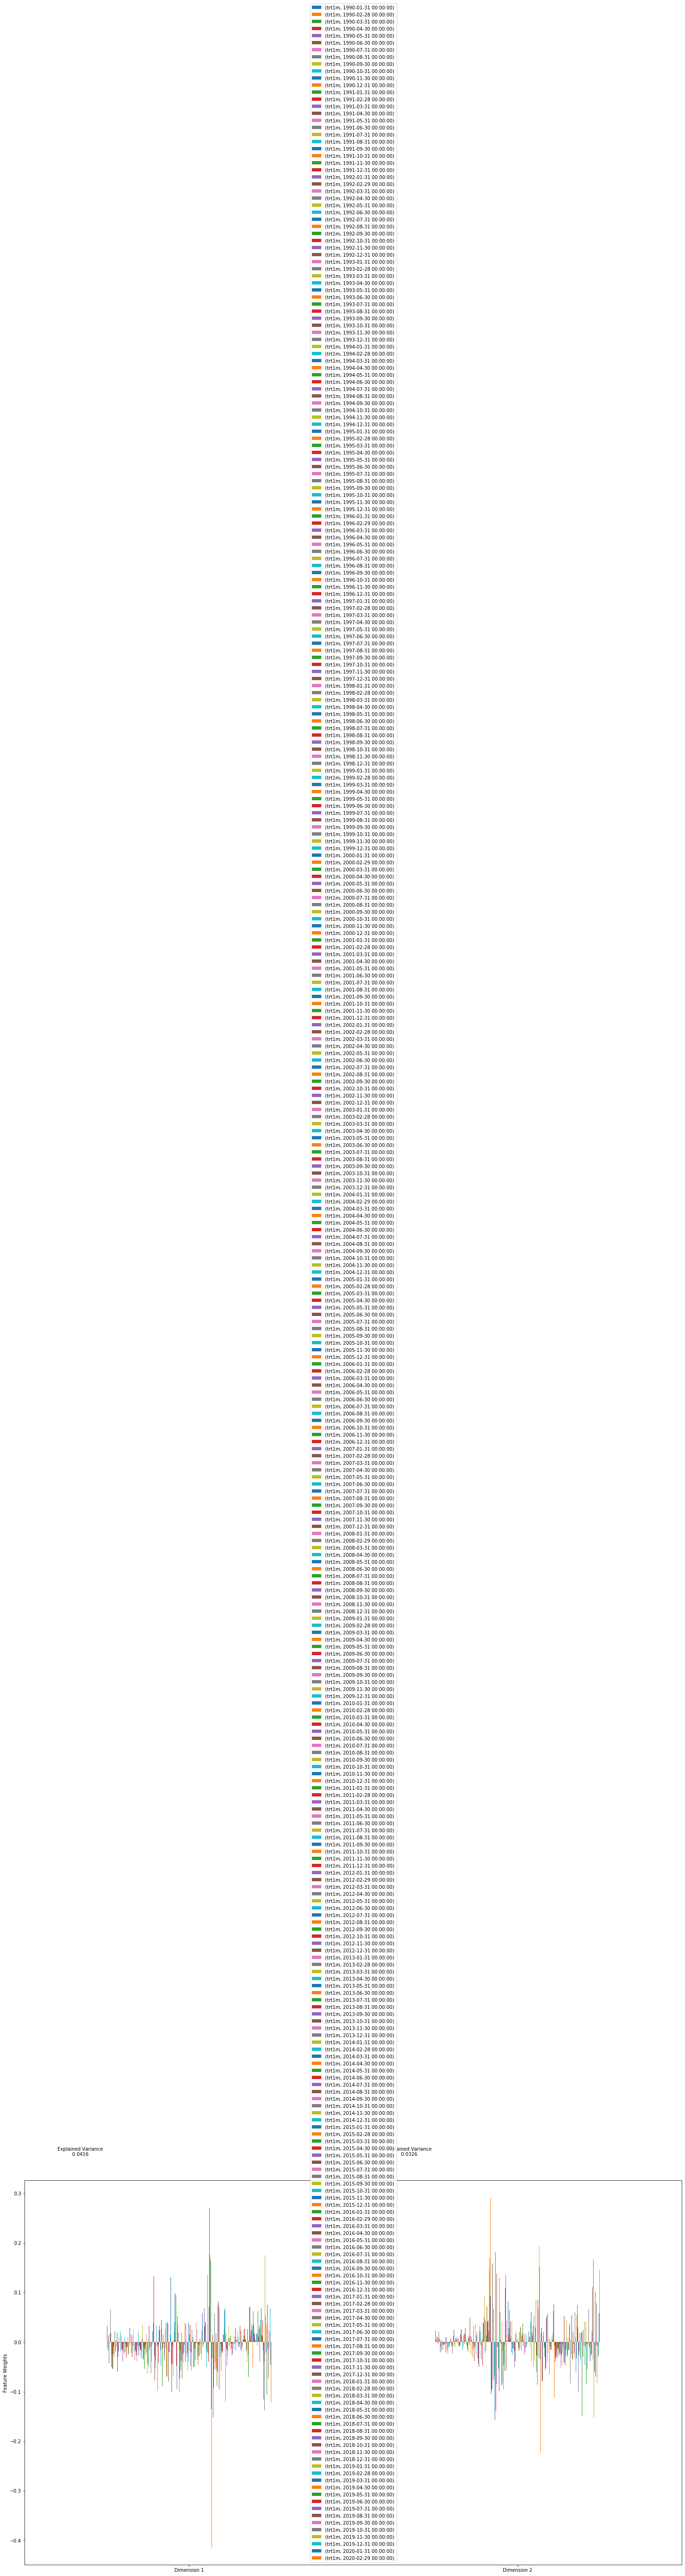

In [10]:
pca_model = PCA(n_components = 2, svd_solver = "full")
reduced_data = pca_model.fit_transform(norm_data)

pca_results(norm_data, pca_model, 5)
# pca_model.explained_variance_ratio_

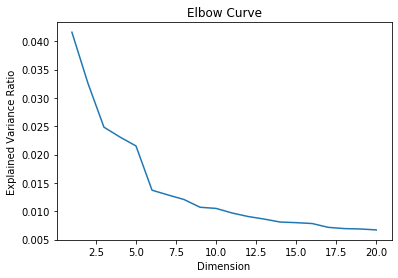

In [11]:
dimension = 20
pca_10dim = PCA(n_components = dimension, svd_solver = "full")
pca_data_10dim = pca_10dim.fit_transform(norm_data)
plt.plot(range(1,dimension+1), pca_10dim.explained_variance_ratio_)
plt.title("Elbow Curve")
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [38]:
# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
ciks = data_pivot.index

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'cik': ciks})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

      labels        cik
2079       0  1323974.0
629        0   740260.0
1231       0   930236.0
636        0   742278.0
637        0   743238.0
...      ...        ...
825        9   827052.0
824        9   825542.0
2191       9  1388195.0
821        9   823768.0
2154       9  1367465.0

[2701 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

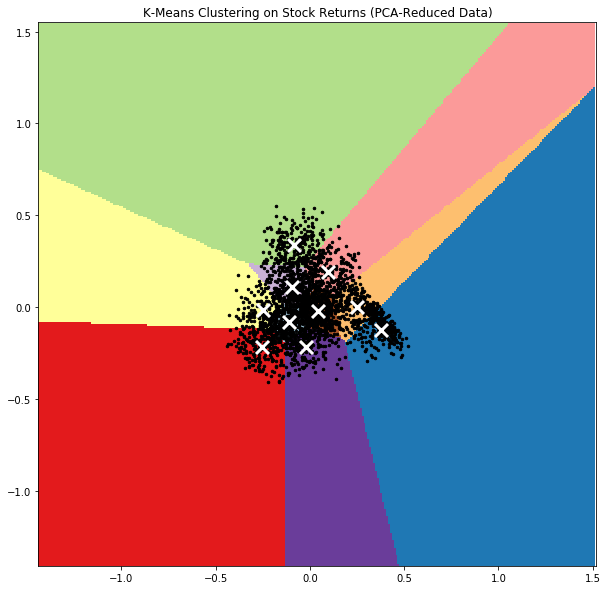

In [50]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Returns (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [84]:
industry_groups = pd.merge(left = df, right = mapping[["conm","industry"]], right_index=True, on="cik")

In [85]:
cluster_agg_data = industry_groups.groupby(['labels', 'industry']).agg(count = ('cik', 'count'))
pd.pivot_table(cluster_agg_data, 
                        values=['count'],
                        index=['industry'],
                        columns=['labels'],
                        aggfunc=np.sum,
                        fill_value=0)

count                           
labels                                  0  1  2  3  4  5  6  7  8  9
industry                                                            
Aerospace & Defense                     2  2  1  1  2  6  9  7  7  5
Air Freight & Logistics                 3  1  0  0  0  1  4  1  0  1
Airlines                                2  1  0  1  0  1  3  4  0  3
Auto Components                         4  8  1  0  3  0  2  1  1  2
Automobiles                             2  2  0  0  1  1  1  0  4  0
...                                   ... .. .. .. .. .. .. .. .. ..
Thrifts & Mortgage Finance              4  3  0  0  0  0  0  9  0  1
Tobacco                                 0  0  0  2  0  0  0  2  0  4
Trading Companies & Distributors        7  4  0  1  1  0  2  0  0  3
Water Utilities                         0  0  0  0  0  2  0  0  0  2
Wireless Telecommunication Services     0  0  4  3  0  3  3  0  1  2

[69 rows x 10 columns]